Alzheimer's Analysis Prediction

In [178]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE


sns.set_theme(style="darkgrid", context="notebook", palette="muted", font="Arial", rc={"figure.figsize": (8, 5)})
pd.set_option('display.max_rows', 1000)

In [74]:
# read the dataset
alzheimer_data=pd.read_csv('alzheimers_disease_data.csv')

In [76]:
# checking the first 5 of the data
alzheimer_data.head(6).T

,0,1,2,3,4,5
PatientID,4751,4752,4753,4754,4755,4756
Age,73,89,73,74,89,86
Gender,0,0,0,1,0,1
Ethnicity,0,0,3,0,0,1
EducationLevel,2,0,1,1,0,1
BMI,22.927749,26.827681,17.795882,33.800817,20.716974,30.626886
Smoking,0,0,0,1,0,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356,4.140144
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461,0.211062
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498,1.584922


In [78]:
# checking the info of the dataset
alzheimer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [80]:
# checking the columns in the dataset
alzheimer_data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [82]:
# checking the dimension of the dataset
alzheimer_data.shape

(2149, 35)

In [84]:
# checking the datatype of the dataset
alzheimer_data.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [86]:
# checking the statistical measure of the dataset
round(alzheimer_data.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.00,620.51,4751.00,5288.00,5825.00,6362.00,6899.00
Age,2149.0,74.91,8.99,60.00,67.00,75.00,83.00,90.00
Gender,2149.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Ethnicity,2149.0,0.70,1.00,0.00,0.00,0.00,1.00,3.00
EducationLevel,2149.0,1.29,0.90,0.00,1.00,1.00,2.00,3.00
BMI,2149.0,27.66,7.22,15.01,21.61,27.82,33.87,39.99
Smoking,2149.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
AlcoholConsumption,2149.0,10.04,5.76,0.00,5.14,9.93,15.16,19.99
PhysicalActivity,2149.0,4.92,2.86,0.00,2.57,4.77,7.43,9.99
DietQuality,2149.0,4.99,2.91,0.01,2.46,5.08,7.56,10.00


In [88]:
# checking the null value in the dataset
alzheimer_data.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [90]:
# checking the duplicated in the dataset
alzheimer_data.duplicated().sum()

0

In [92]:
# counting the number of occurence in the column Doctor in charge
alzheimer_data['DoctorInCharge'].unique()

array(['XXXConfid'], dtype=object)

In [94]:
# dropping the unnessary columns
alzheimer_data.drop(columns=['PatientID','DoctorInCharge'], axis=1,inplace=True)

 Data Exploration Summary <br>

- The datasets contains a total of **2,149 observations**. <br>
- All value in the dataset are **non-value** and **numerical**. <br>
- There is **no duplicated** values. <br>
- After removing the columns DoctorInCharge and PatientID, the datasets consists of **33** columns.

In [97]:
# Distribution of Categorical columns

custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
}



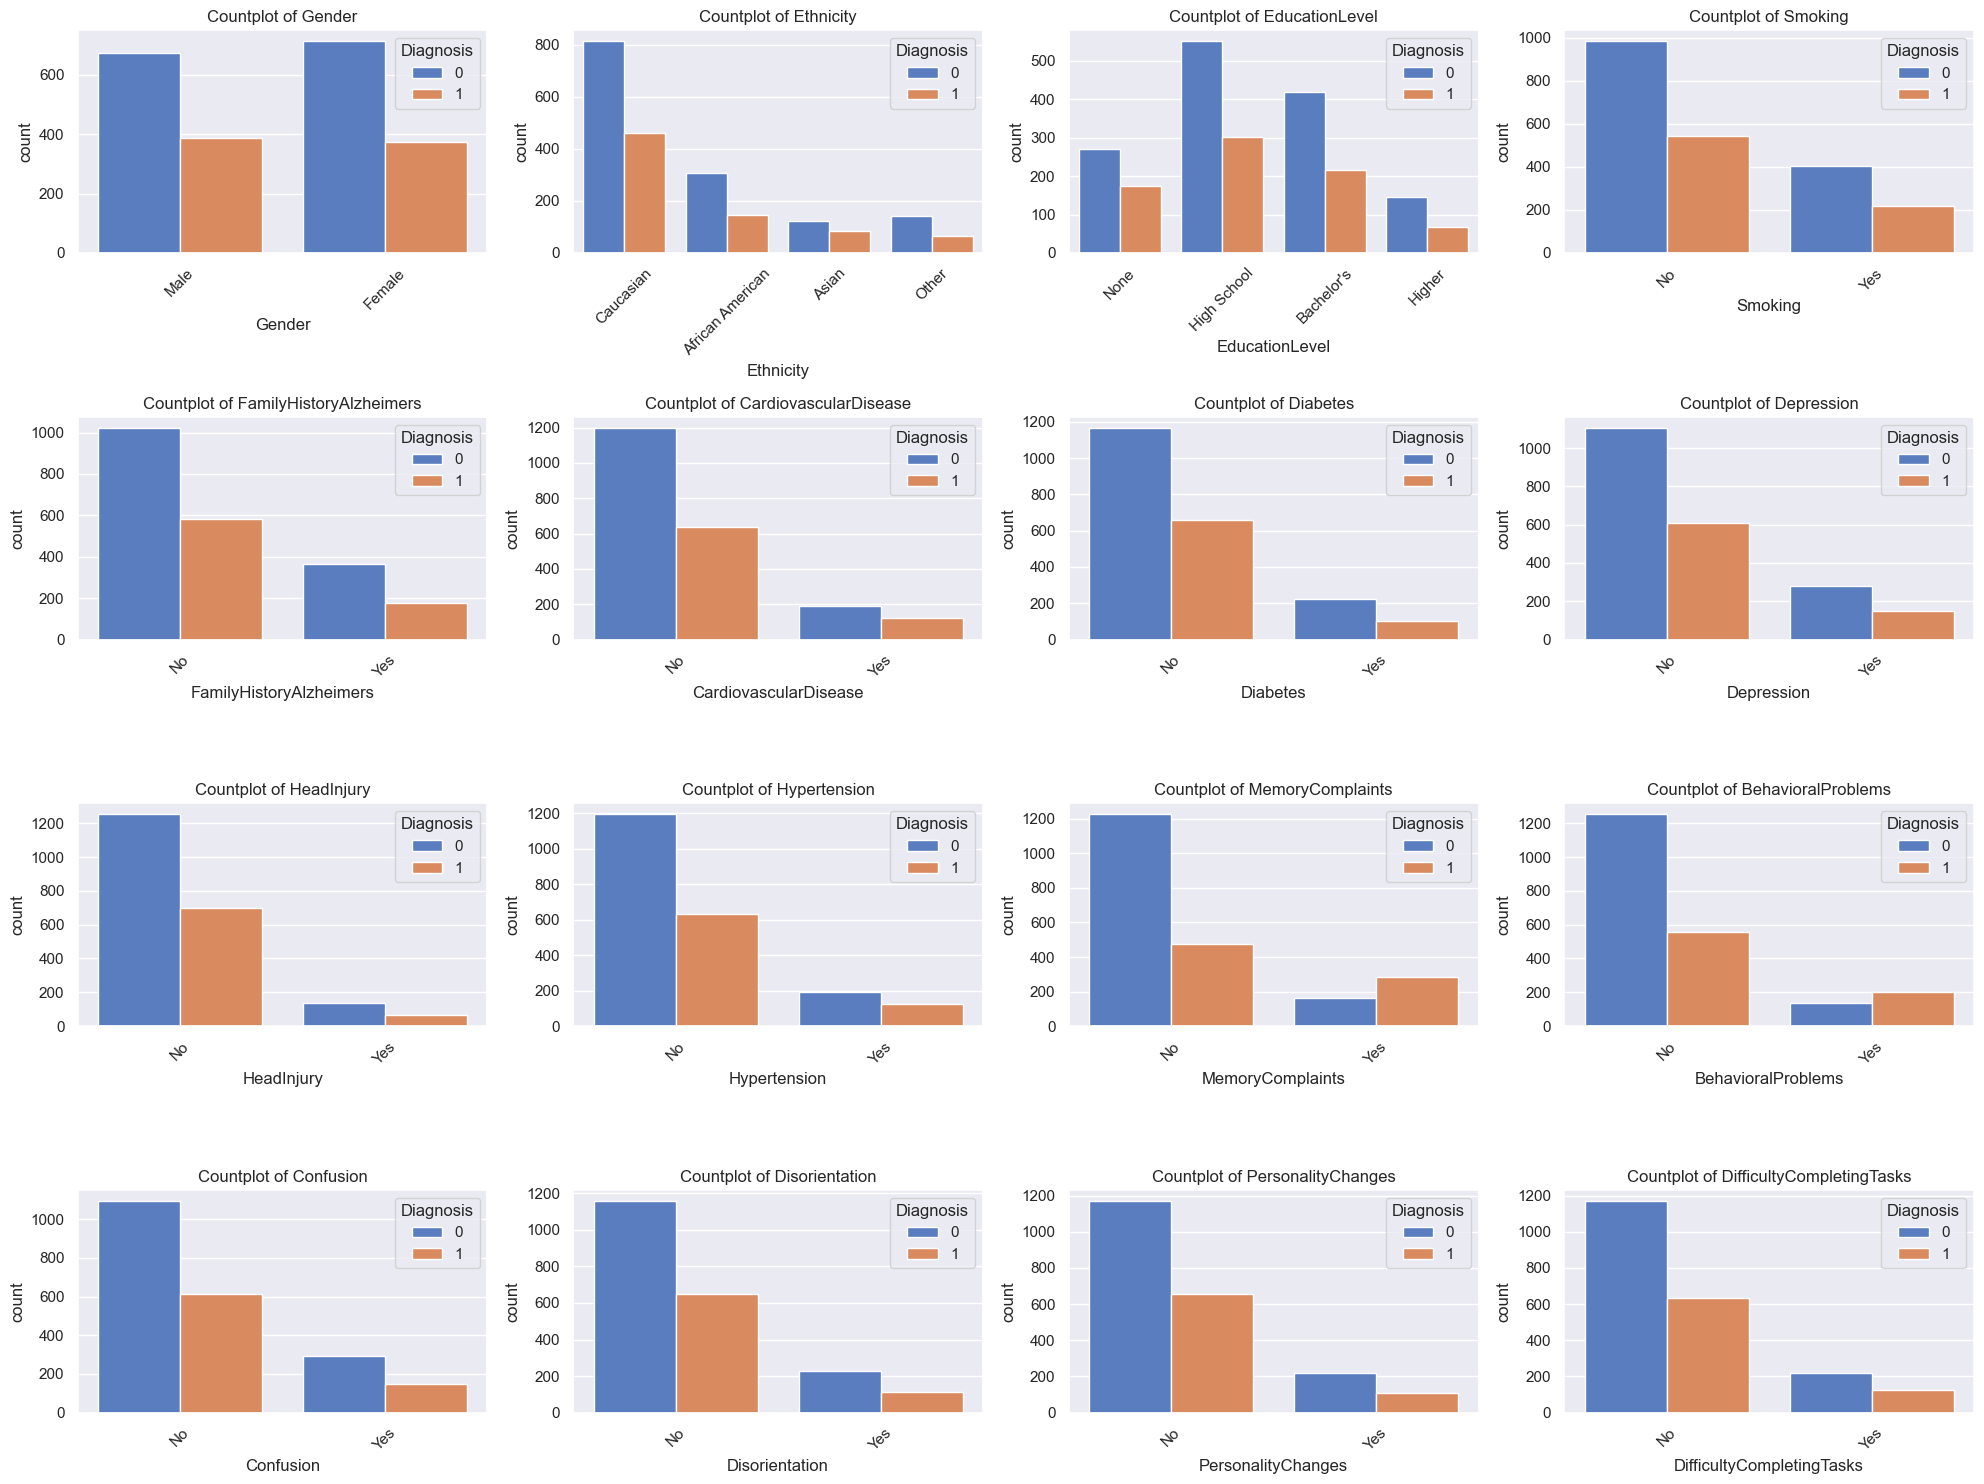

In [99]:
# distribution of the categoeical columns using countplot


fig, axes = plt.subplots(4,4, figsize=(20, 15))

axes = axes.flatten()

for i, col in enumerate(custom_labels):
    sns.countplot(data=alzheimer_data, x=col, hue=alzheimer_data['Diagnosis'], ax=axes[i])
    axes[i].set_title(f'Countplot of {col}') 

    # Customize x-tick labels
    labels = custom_labels[col]
    ticks = range(len(labels))
    axes[i].set_xticks(ticks)
    axes[i].set_xticklabels(labels, rotation=45)  

for i in range(len(custom_labels), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()


In [100]:
numerical_columns = [col for col in alzheimer_data.columns if alzheimer_data[col].nunique() > 10]

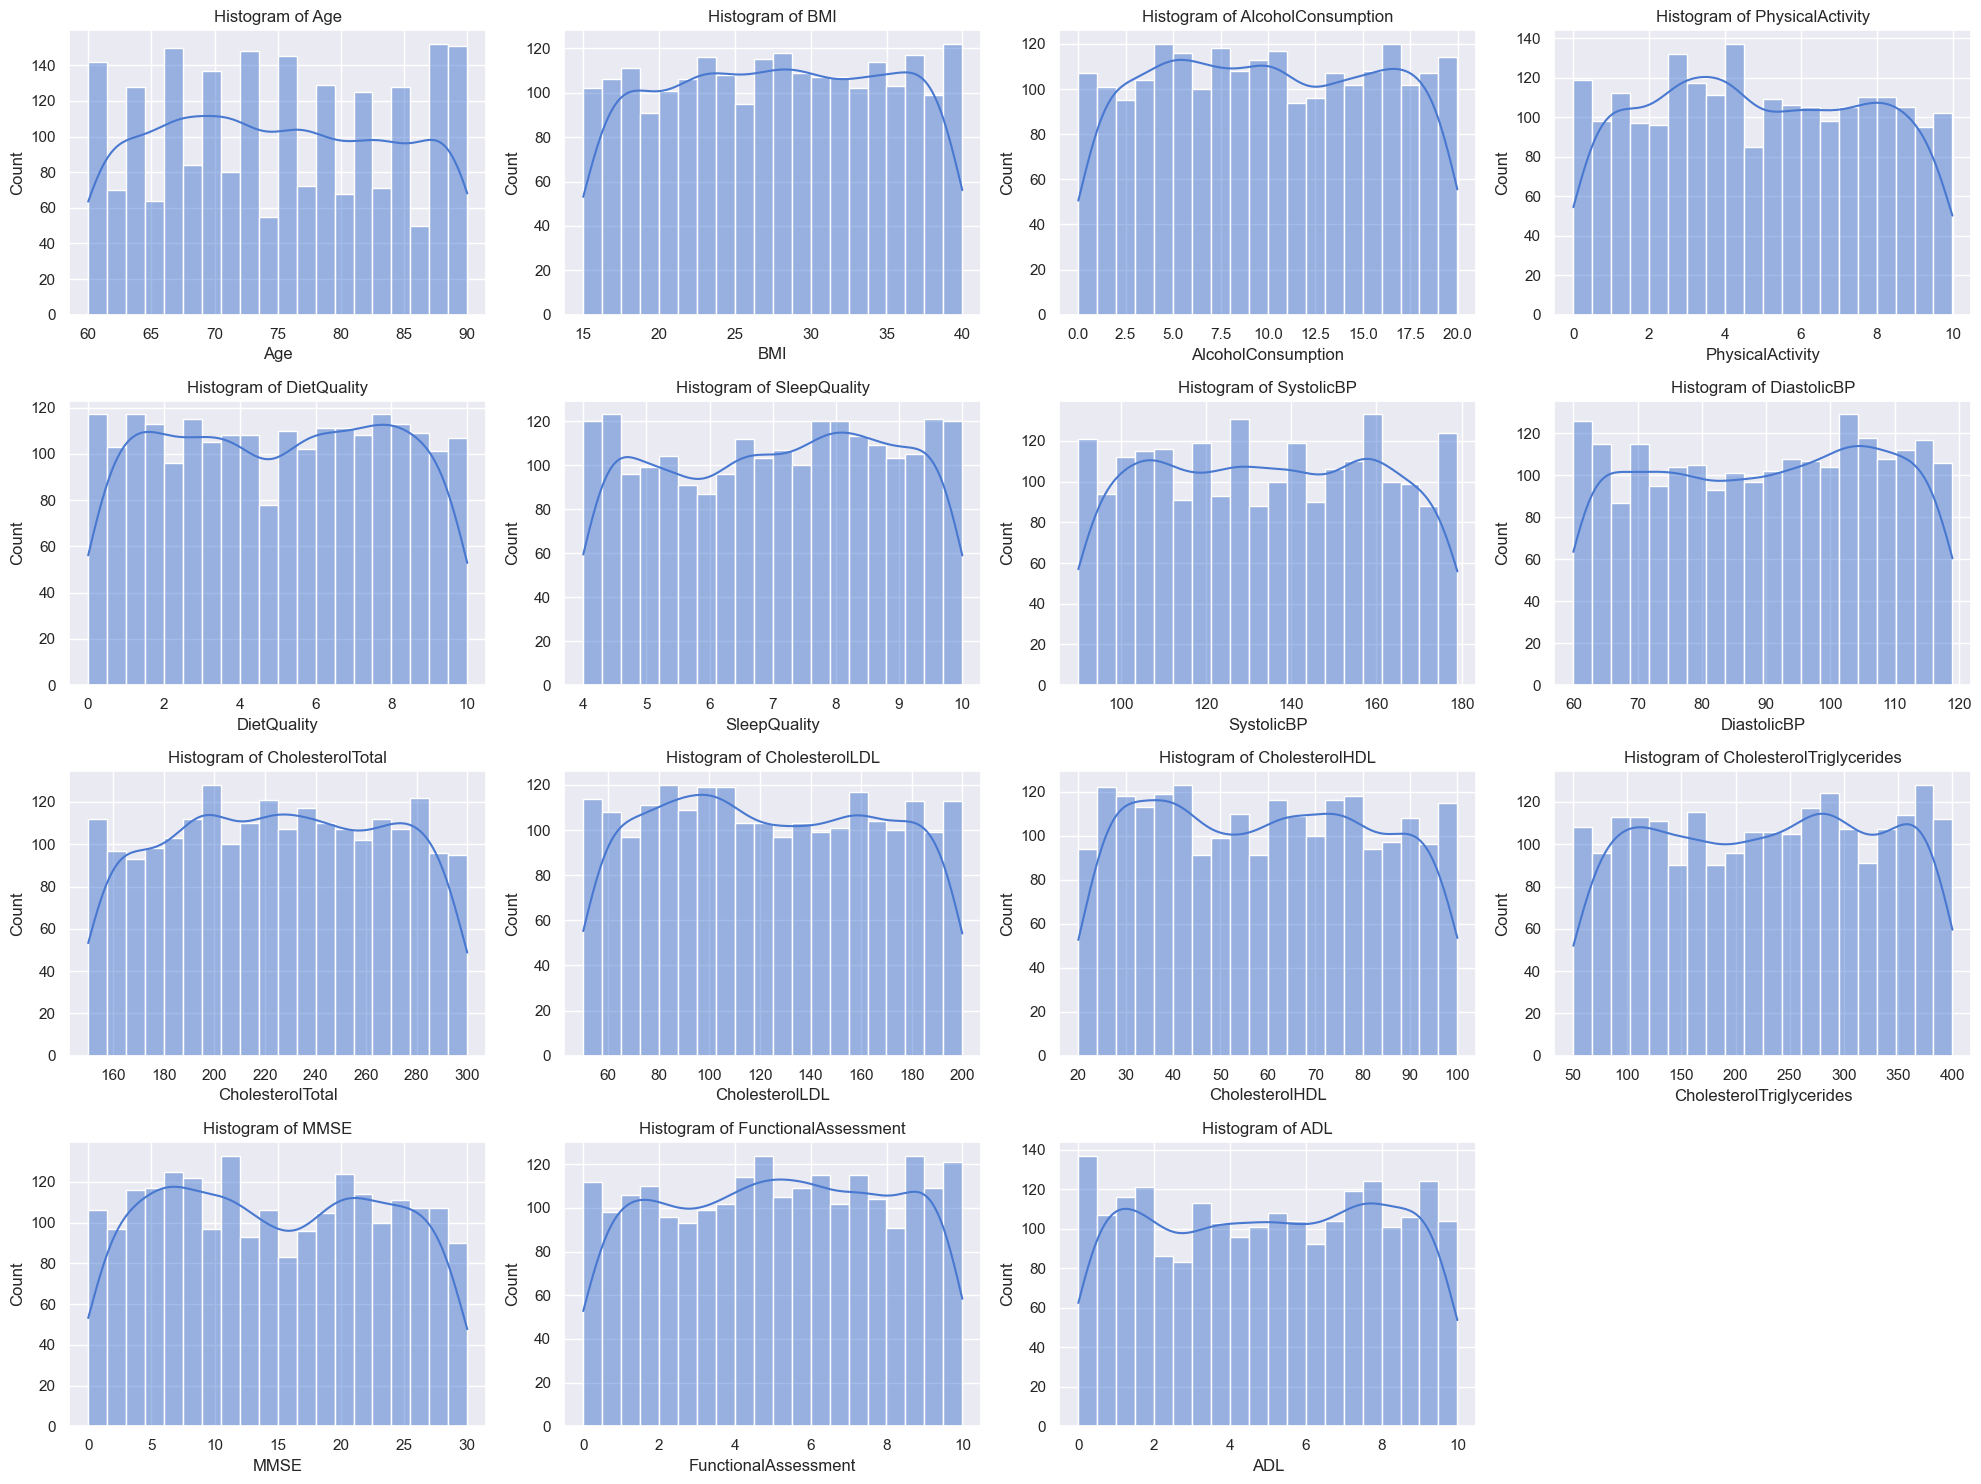

In [103]:
# distribution of the numerical columns using histplot

fig, axes = plt.subplots(4,4, figsize=(20, 15))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=alzheimer_data, x=col,kde=True,bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}') 

    

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

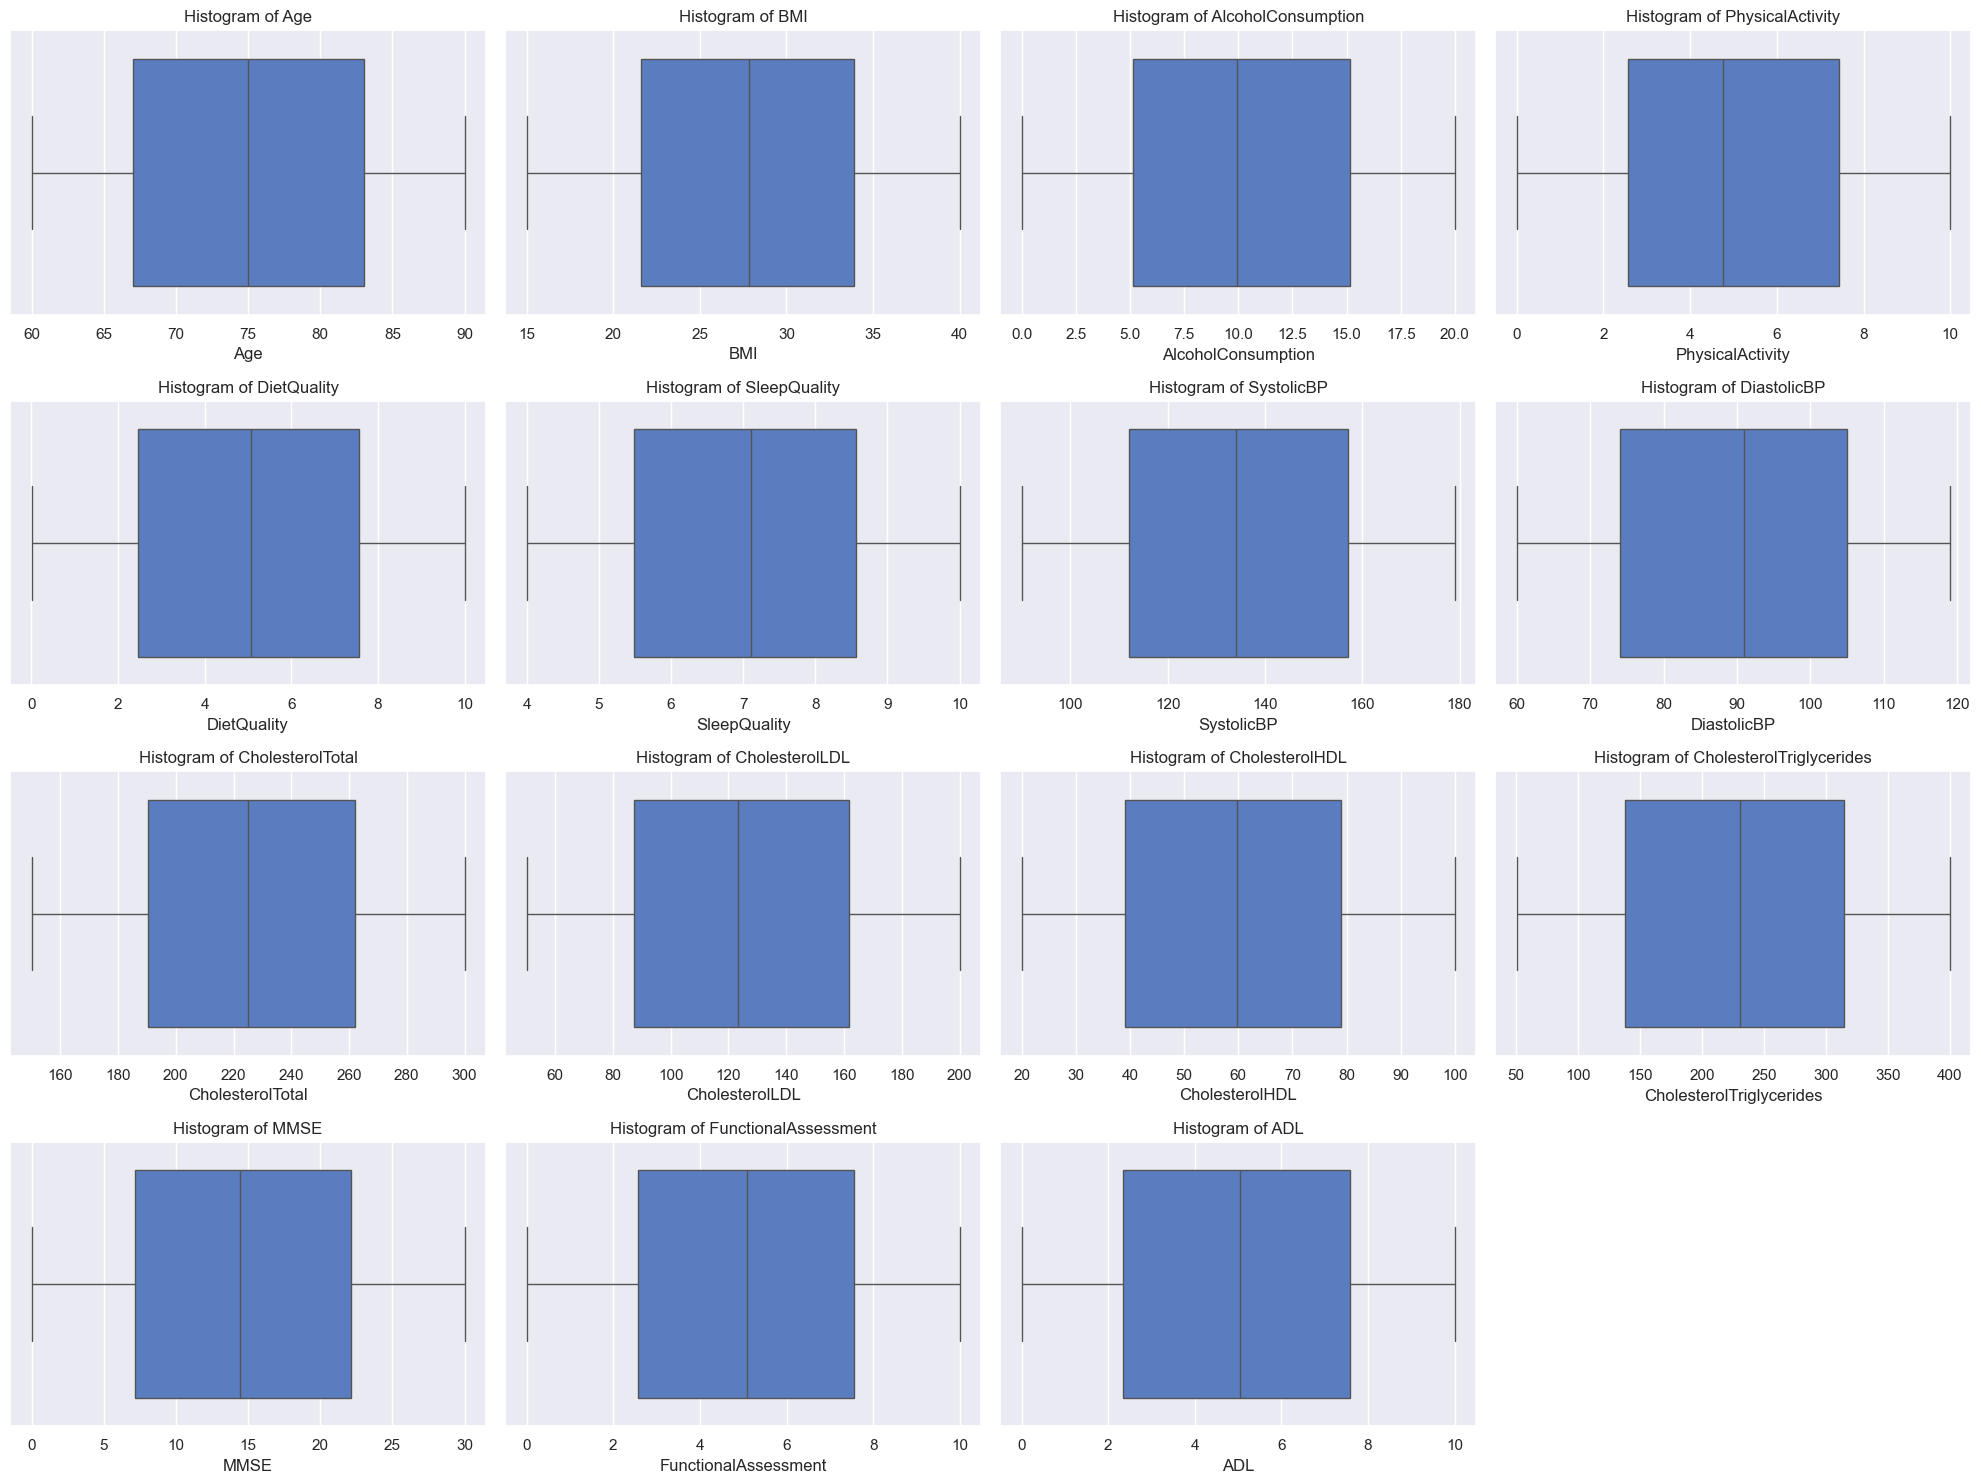

In [104]:
# checking for outliers using box plot

fig, axes = plt.subplots(4,4, figsize=(20, 15))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=alzheimer_data, x=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}') 

    

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

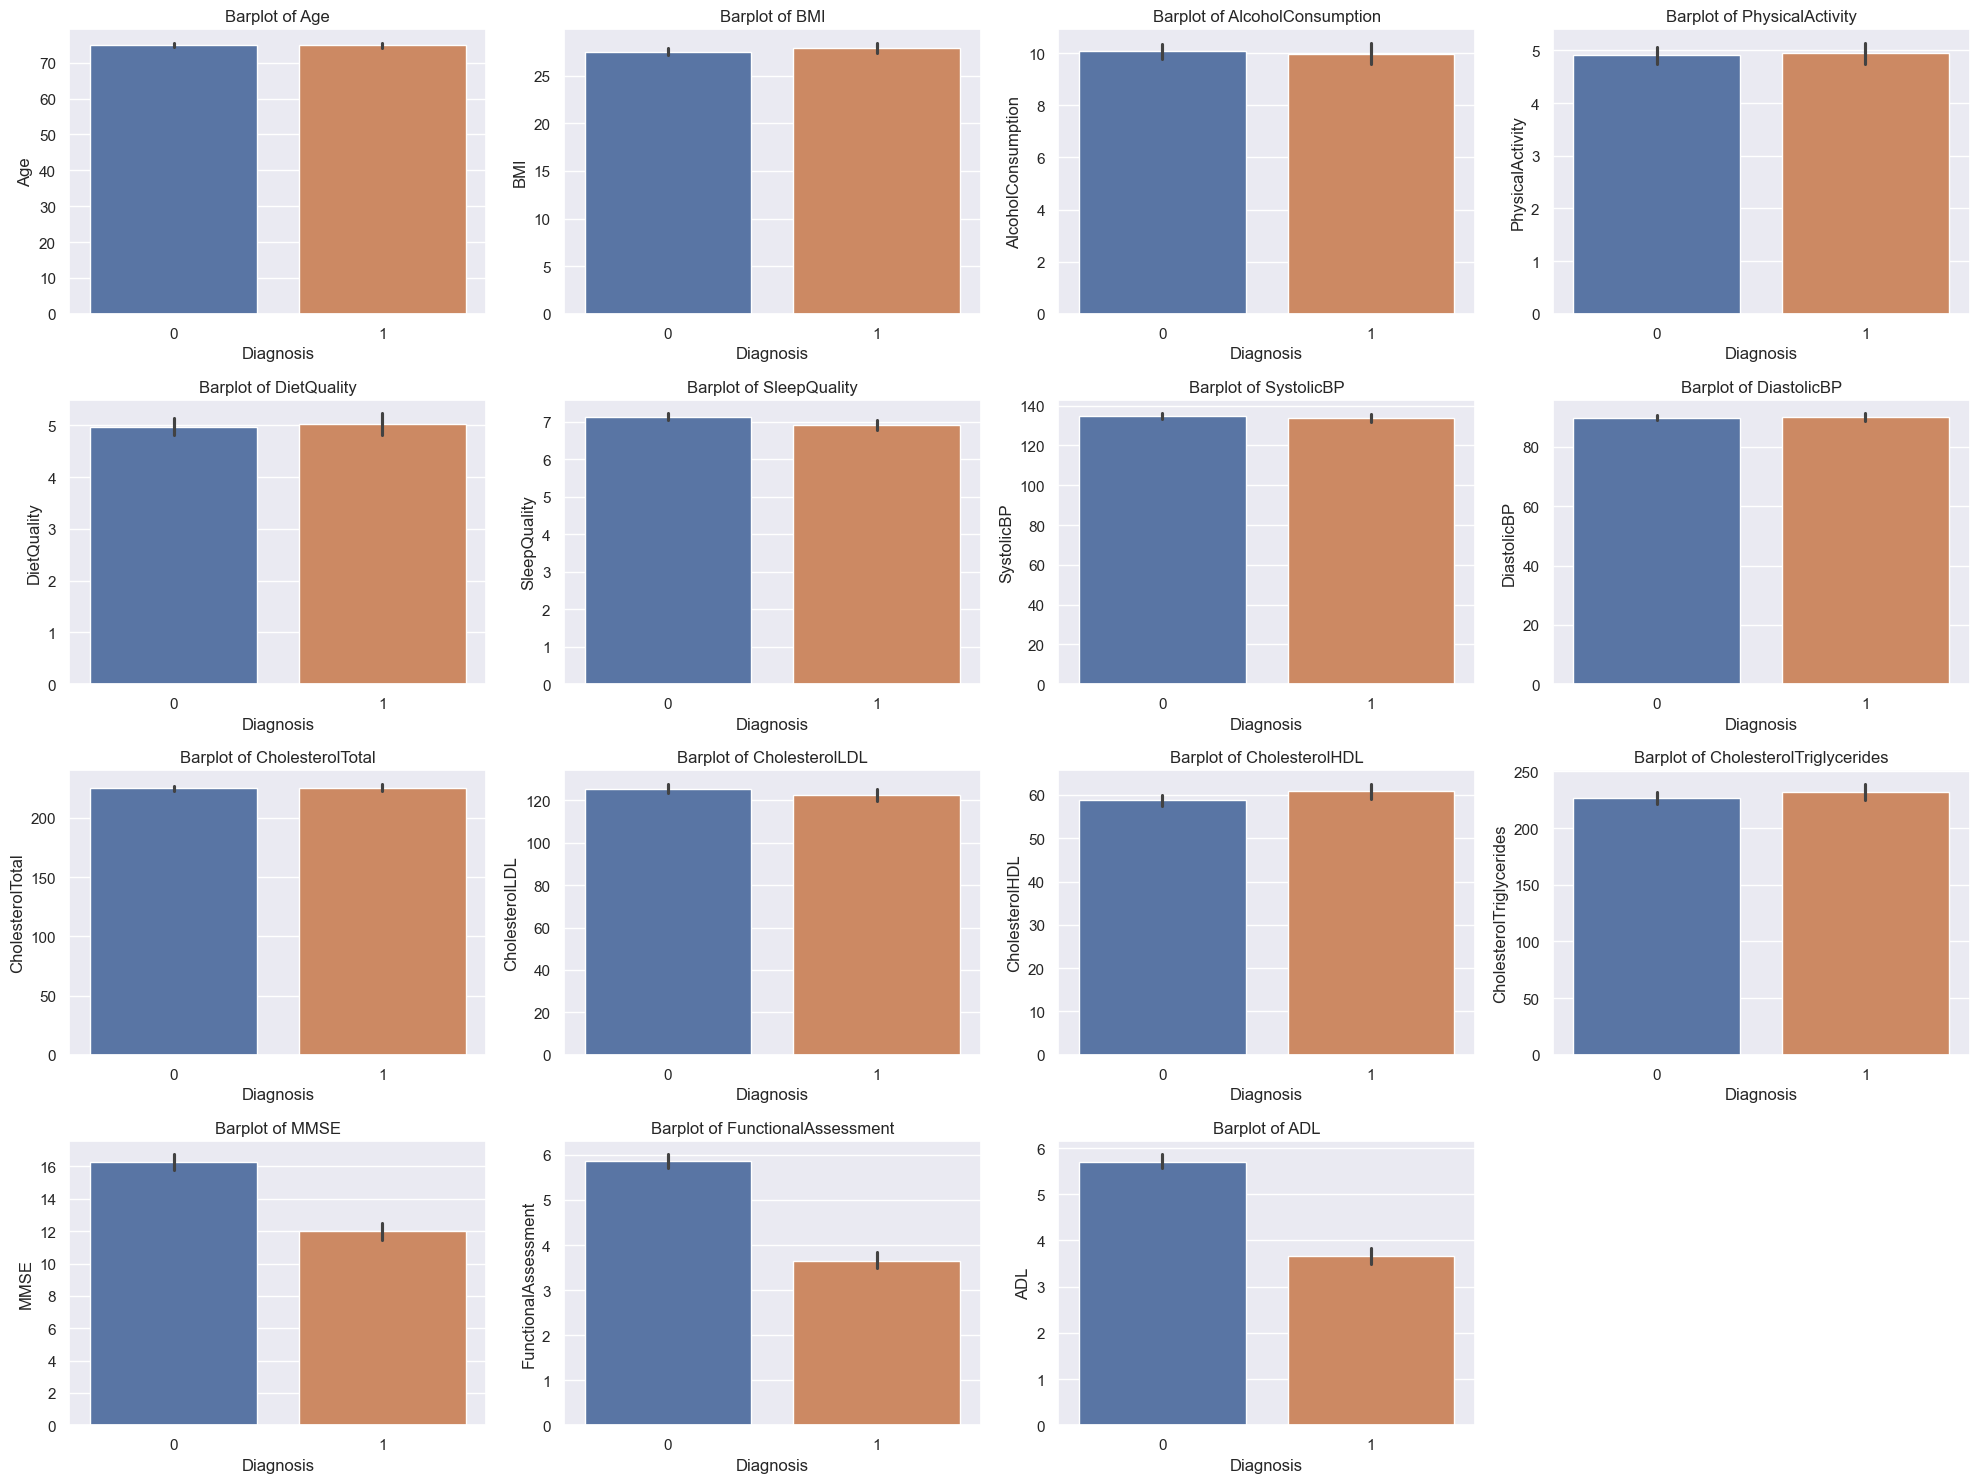

In [105]:
# distribution of the numerical columns with the target variable using barplot

fig, axes = plt.subplots(4,4, figsize=(20, 15))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.barplot(data=alzheimer_data, x='Diagnosis', y=col, ax=axes[i],palette='deep')
    axes[i].set_title(f'Barplot of {col}') 

    

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

<Axes: >

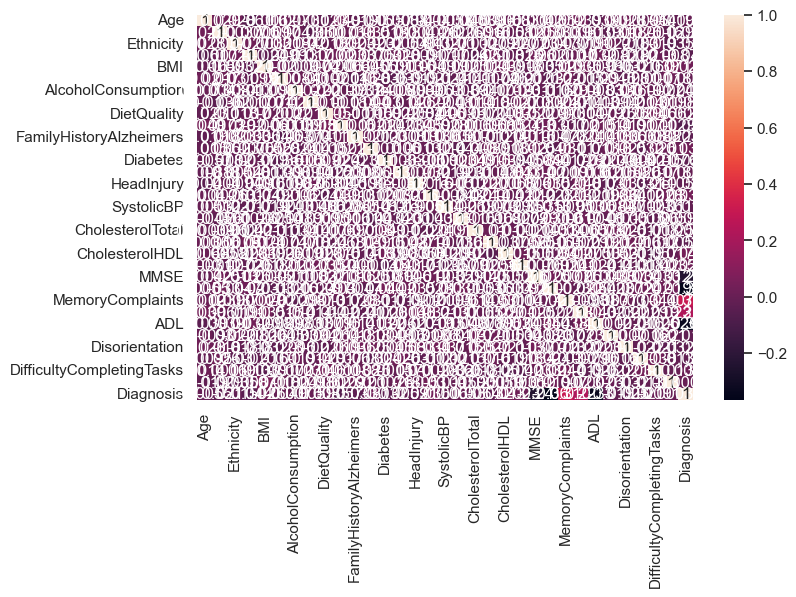

In [106]:
sns.heatmap(alzheimer_data.corr(),annot=True)

In [107]:
# figuring out the most correlated feature among the variables
target_column =alzheimer_data.corr()['Diagnosis'].apply(abs).sort_values(ascending=False)

In [108]:
selected_column= target_column[:23].index

In [109]:
selected_column=list(selected_column)

In [145]:
selected_column

['Diagnosis',
 'FunctionalAssessment',
 'ADL',
 'MemoryComplaints',
 'MMSE',
 'BehavioralProblems',
 'SleepQuality',
 'EducationLevel',
 'CholesterolHDL',
 'Hypertension',
 'FamilyHistoryAlzheimers',
 'CholesterolLDL',
 'Diabetes',
 'CardiovascularDisease',
 'BMI',
 'Disorientation',
 'CholesterolTriglycerides',
 'HeadInjury',
 'Gender',
 'PersonalityChanges',
 'Confusion',
 'SystolicBP',
 'Ethnicity']

In [111]:
alzheimer=alzheimer_data[selected_column]

In [112]:
alzheimer.head(5)

,Diagnosis,FunctionalAssessment,ADL,MemoryComplaints,MMSE,BehavioralProblems,SleepQuality,EducationLevel,CholesterolHDL,Hypertension,...,CardiovascularDisease,BMI,Disorientation,CholesterolTriglycerides,HeadInjury,Gender,PersonalityChanges,Confusion,SystolicBP,Ethnicity
0,0,6.518877,1.725883,0,21.463532,0,9.025679,2,33.682563,0,...,0,22.927749,0,162.189143,0,0,0,0,142,0
1,0,7.118696,2.592424,0,20.613267,0,7.151293,0,79.028477,0,...,0,26.827681,0,294.630909,0,0,0,0,115,0
2,0,5.895077,7.119548,0,7.356249,0,9.673574,1,69.772292,0,...,0,17.795882,1,83.638324,0,0,0,0,99,3
3,0,8.965106,6.481226,0,13.991127,1,8.392554,1,68.457491,0,...,0,33.800817,0,277.577358,0,1,0,0,118,0
4,0,6.045039,0.014691,0,13.517609,0,5.597238,0,56.874305,0,...,0,20.716974,0,291.198780,0,0,1,0,94,0


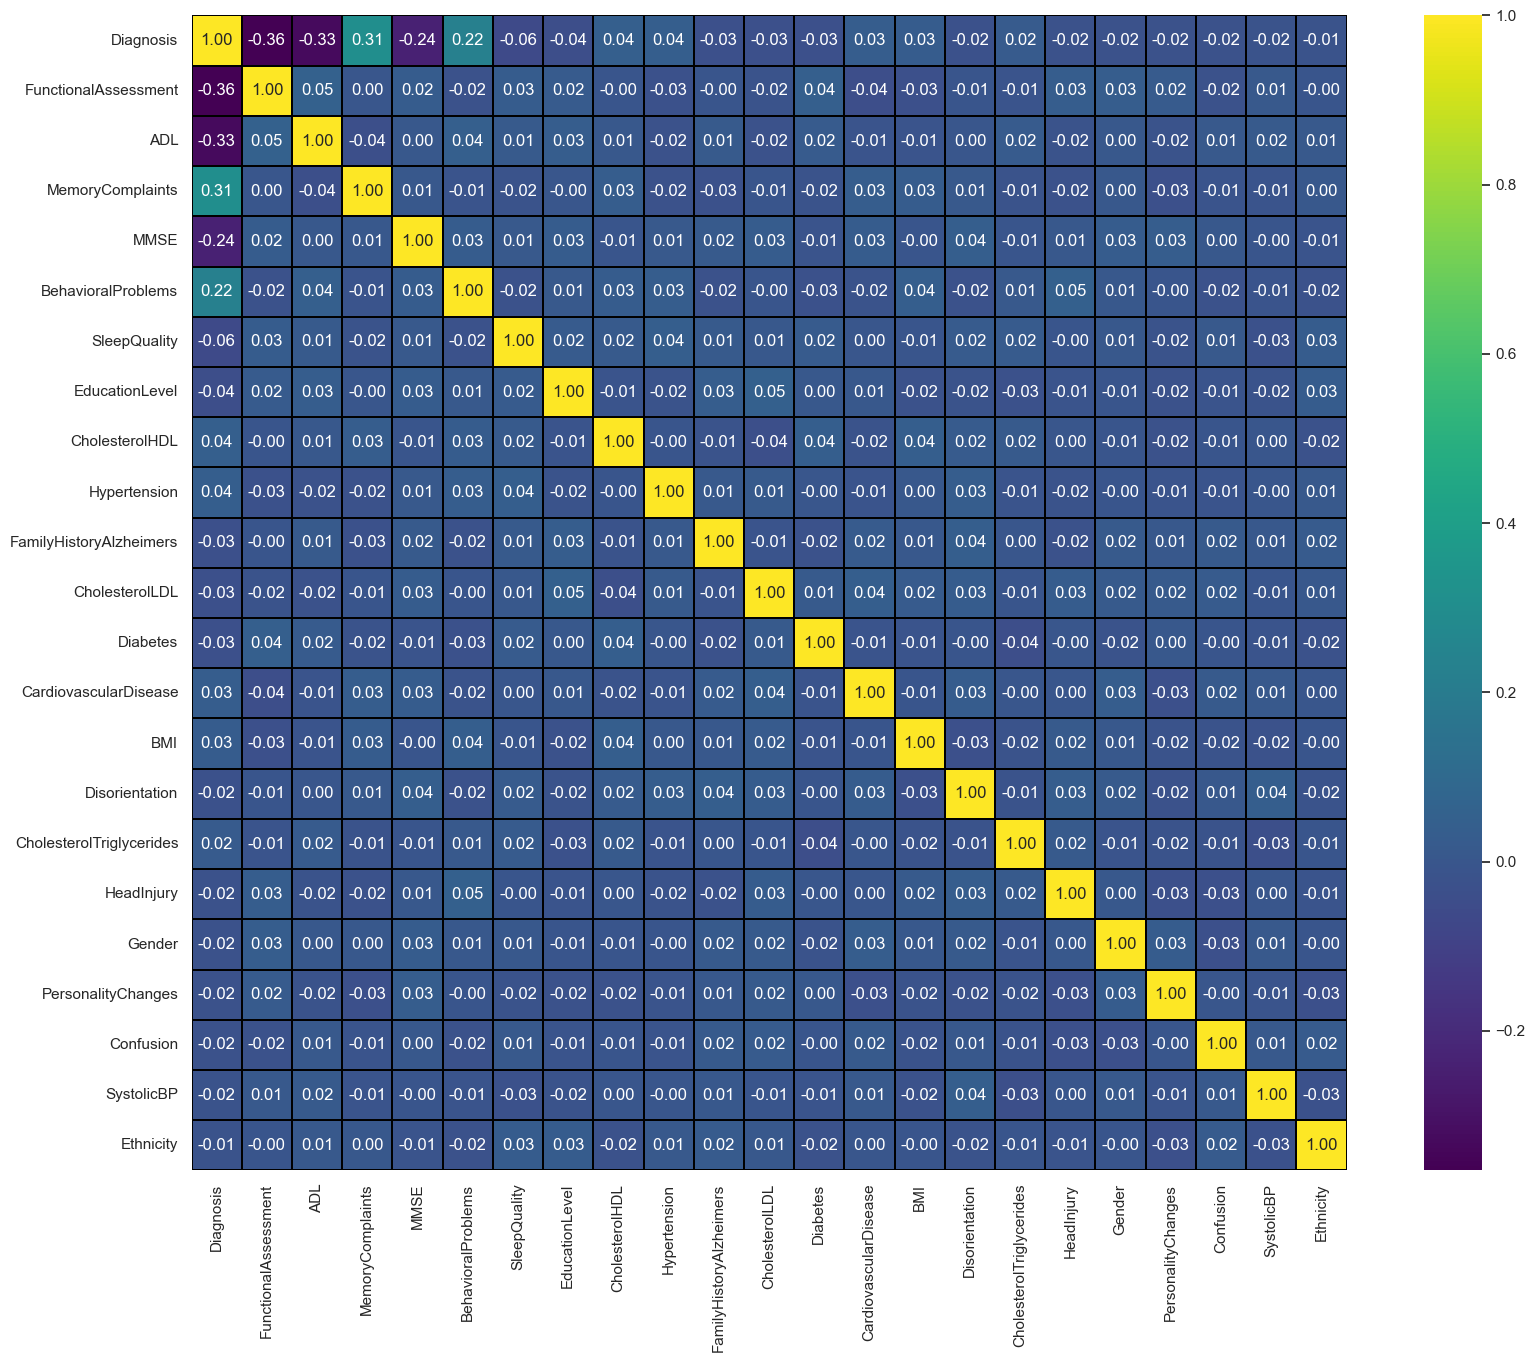

In [113]:
# visualizing the correlation
plt.figure(figsize=(20,15))
sns.heatmap(alzheimer.corr(),annot=True,cmap='viridis',linewidths=0.1,linecolor='black',fmt='.2f',square=True)
plt.show()

Distributing of the most correlated columns across the target variable

In [117]:
num_corr=['FunctionalAssessment','ADL','MMSE']
cat_corr=['MemoryComplaints','BehavioralProblems']

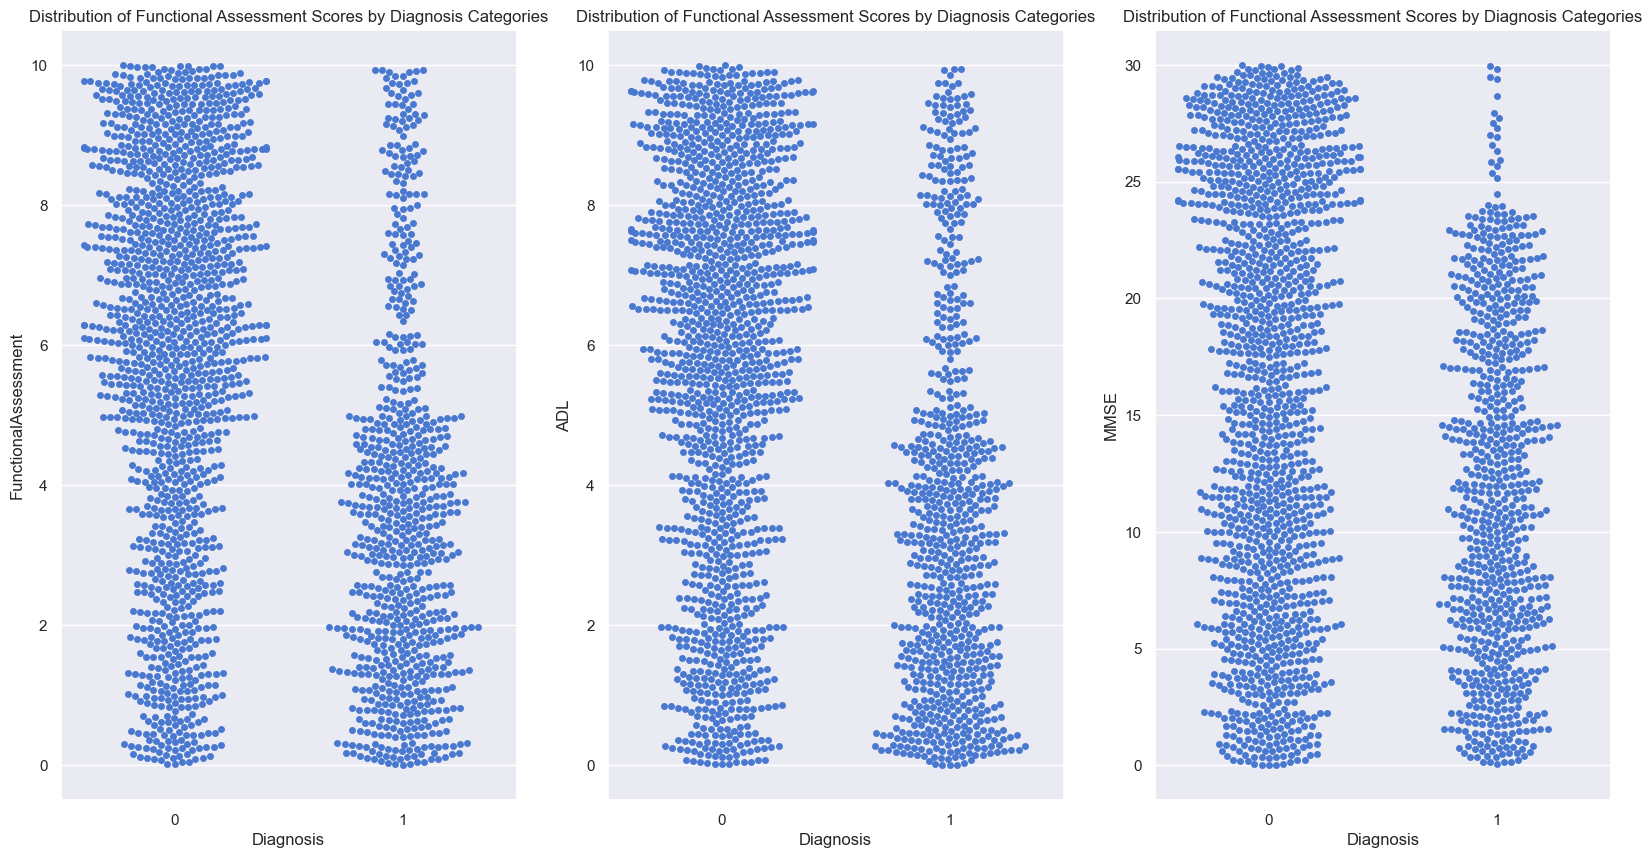

In [139]:
# Distribution of the most releted numerical columns with the target column


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.swarmplot(data=alzheimer,y='FunctionalAssessment',x='Diagnosis')
plt.title('Distribution of Functional Assessment Scores by Diagnosis Categories')


plt.subplot(1,3,2)
sns.swarmplot(data=alzheimer,y='ADL',x='Diagnosis')
plt.title('Distribution of ADL Scores by Diagnosis Categories')

plt.subplot(1,3,3)
sns.swarmplot(data=alzheimer,y='MMSE',x='Diagnosis')
plt.title('Distribution of MMSE Scores by Diagnosis Categories')
plt.show()

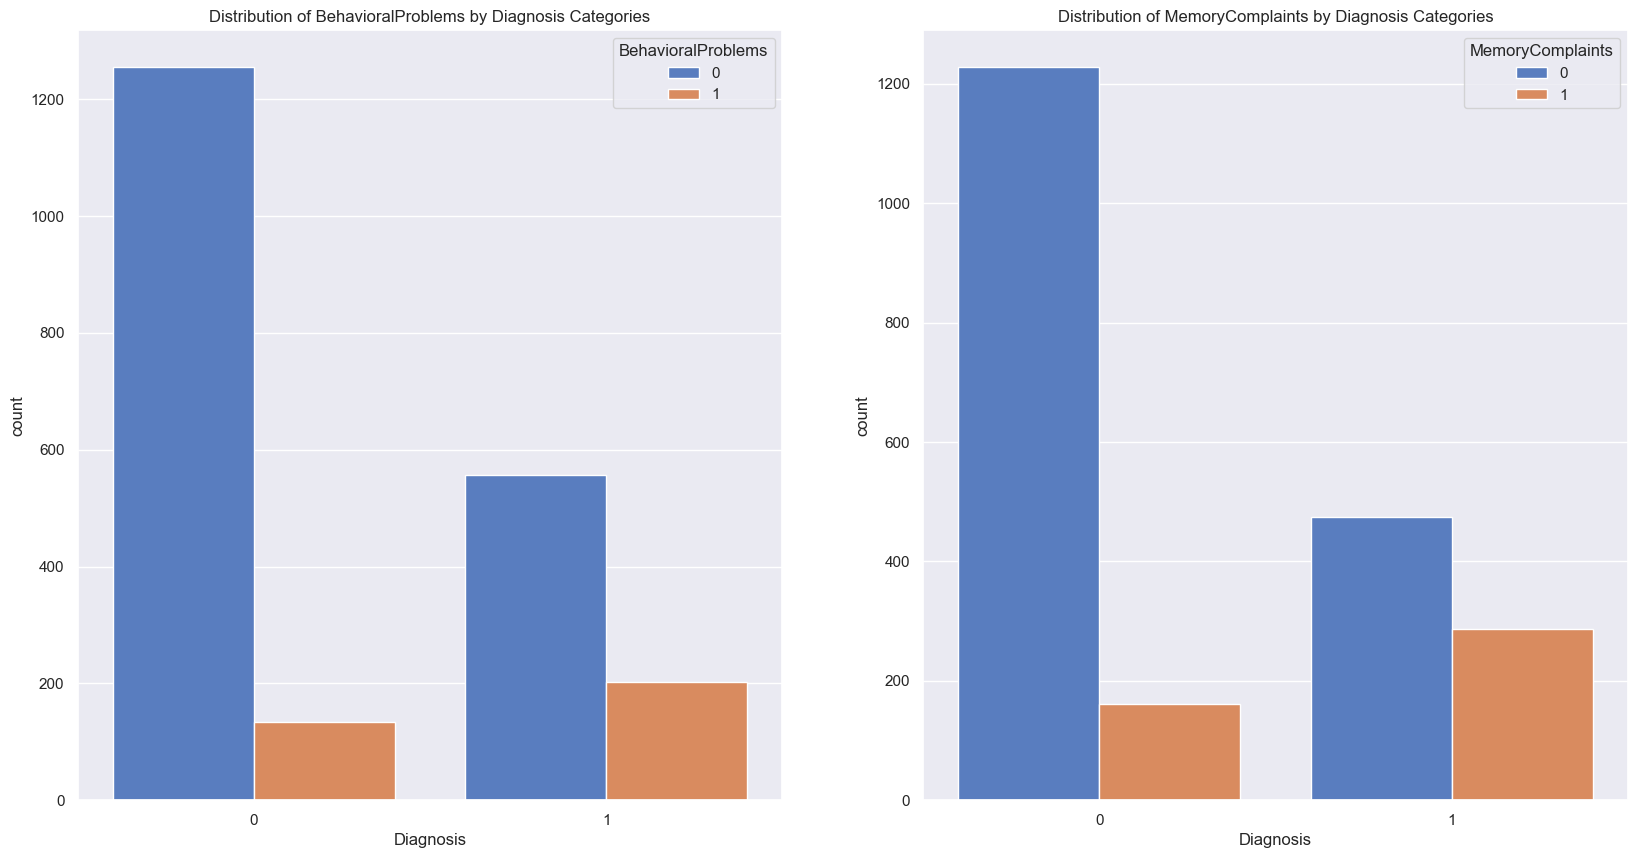

In [141]:
# Distribution of the most releted categorical columns with the target column


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(data=alzheimer,x='Diagnosis', hue='BehavioralProblems')
plt.title('Distribution of BehavioralProblems by Diagnosis Categories')


plt.subplot(1,2,2)
sns.countplot(data=alzheimer,x='Diagnosis', hue='MemoryComplaints')
plt.title('Distribution of MemoryComplaints by Diagnosis Categories')

plt.show()

Distribution of the target variable

In [156]:
alzheimer['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

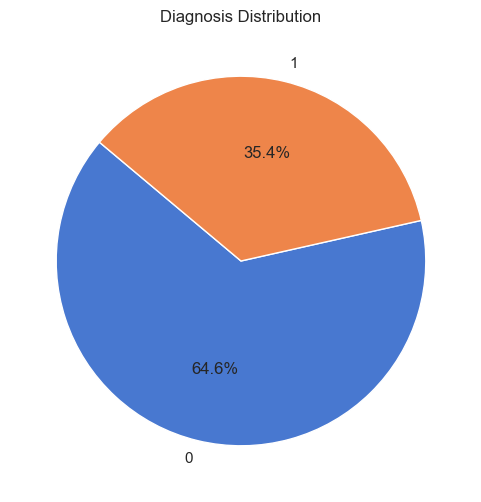

In [172]:
# visualizing the target variable using pie chart
categories=[0,1]
count=alzheimer['Diagnosis'].value_counts().to_list()
colors=sns.color_palette('muted')
plt.figure(figsize=(6,6))
plt.pie(x=count,labels=categories,autopct='%1.1f%%',colors=colors,startangle=140)
plt.title('Diagnosis Distribution')
plt.show()

In [174]:
# split data into features and target
X= alzheimer.drop('Diagnosis',axis=1)
y=alzheimer['Diagnosis']

In [176]:
# split into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [188]:
# since thee is imblance in the distribution of the target ,then we use SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X_train,y_train)

In [192]:
# Standardize the features
scaled=StandardScaler()
X_train_scaled =scaled.fit_transform(X_smote)
X_test_scaled=scaled.transform(X_test)

In [196]:
#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

In [198]:
#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

In [206]:
#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
    grid_search.fit(X_train_scaled, y_smote)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    print('accuracy :', accuracy_score(y_test,y_pred))
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

accuracy : 0.9395348837209302
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       277
           1       0.92      0.91      0.91       153

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.93       430
weighted avg       0.94      0.94      0.94       430

Best Parameters: {'max_depth': 5}

accuracy : 0.9209302325581395
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.94      0.83      0.88       153

    accuracy                           0.92       430
   macro avg       0.93      0.90      0.91       430
weighted avg       0.92      0.92      0.92       430

Best Parameters: {'max_depth': None, 'n_estimators': 200}

accuracy : 0.7093023255813954
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score  

After applying all the model using different hyperparameter tuning, DecisionTreeClassifier has the highest Accuracy.

In [249]:
# fiting the best model... which is DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train_scaled,y_smote)
y_pred=dt_model.predict(X_test_scaled)

In [255]:
# evaluating the model
y_pred_acc=round(accuracy_score(y_test,y_pred)*100,2)
y_pred_acc

93.95

In [275]:
# testing the model on the model
X_new=X_test.iloc[10]
X_new_scaled =scaled.transform([X_new])


In [277]:
# predicting on the new test data
dt_model.predict(X_new_scaled)


array([0], dtype=int64)

In [279]:
# checking the actual outcome
y_test.iloc[10]


0